Before reading this Jupyter Notebook, it may be helpful to review [angular velocity](Angular_Velocity.ipynb).

# Orbital Dynamics Within Synestias

## Synestias Obey Conservation of Angular Momentum
Synestias can form over a range of total system <i>angular momentum</i>. Potential Moon-forming Earth-mass synestias undergo rapid rotation and have more angular momentum than the present Earth-Moon system. Higher angular momentum in a synestia allows a couple of interesting consequences. The droplets and moonlets growing in a synestia move based on exchange of angular momentum with the gas surrounding them. The corotating region of a synestia will spin faster if it accretes more mass from decaying droplets and moonlets. Why does this happen? Synestias cannot violate conservation of angular momentum.

## ...As Does Everything Else in the Universe

All matter in the universe must obey the laws of conservation. Physics demands that angular momentum must be conserved in the universe. In other words, angular momentum L of a system does not change with time t such that

$$\frac{dL}{dt} = 0$$

unless acted upon by a force external to the system. A <i>torque</i> ($\tau$) imparts rotational acceleration that changes the angular momentum of a body,

$$\sum\tau = \frac{dL}{dt}$$

The equation for a torque $\tau$ is given by

$$\tau = r \times F$$

where F is a force that is perpendicular to the rotational axis, a radial distance r away. Like linear forces, there may be many torques that act summatively on a system. If the net torque on a system is zero, then angular momentum does not change with time.

We deal with torques on a daily basis. Every time we open a door, we are exerting a torque on the door handle to swing the door open. Handles on doors are always farthest from the hinges of a door because it requires less effort (force F) on your part if the distance (r) to the axis of rotation (the vertical line where the hinges of the door meet a wall) is larger (see image below). Try this for yourself -- have you noticed how much more difficult it is to open a door when you are pushing on it close to the door's hinges?

![title](Figures/FigureDoorTorque.png)

<i>Caption</i>. Torques exerted by pushing open a door. By pushing on a door at a larger radius (r$_2$), relative to the axis of rotation (grey dashed line on side of door with hinges on left), less perpendicular force (F$_2$) is needed to rotate the door at a given angular velocity ($\omega$). Credit: G. O. Hollyday.

If a body or system needs to lose angular momentum, a torque must displace it somewhere. There is no way to remove angular momentum from the universe. Conversely, there is no way to generate more angular momentum in the universe. Angular momentum is gained by transferring it from somewhere else.

## What is Angular Momentum?
Angular momentum L is

$$L = r \times p = r \times m v = m r^2 \omega$$

where p is linear momentum (equal to the product of a body's mass m and linear velocity v) and r is the radial distance from the rotational axis to the body. The radius r must be perpendicular to the direction of the body's linear motion. The body has an angular velocity $\omega$ about the rotational axis. The more massive the body is, the faster the body is moving on a curving path, and the larger the distance from the rotational axis the body is, the more angular momentum the body has. Similar to angular velocity, angular momentum can describe either: 1) smaller components within a solid body undergoing rotation or 2) a body in orbit.

### Case 1: Solid Body Rotation

![title](Figures/FigureSkaterAM.png)

<i>Caption</i>. To increase their spin from $\omega$ to $\omega$', a figure skater with mass m must draw their arms and legs in towards the center of their body (the rotation axis; dashed grey vertical line). Credit: G. O. Hollyday.

Consider a figure skater that is spinning with her limbs extended (see image above). According to conservation of angular momentum, she must bring her limbs in close to her body in order to spin faster. Her overall mass will not change, so if she wants to increase her rotational velocity, she must reduce the distance between the outermost parts of her body and her rotational axis. A figure skater who is more massive would have greater overall angular momentum.

### Case 2: Orbital Motion
Elliptical orbits are possible due to conservation of angular momentum. Consider a planet  that is stably orbiting about a central mass (a star). In the farthest part of its eccentric orbit, the planet will transit at its slowest orbital velocity (minimum $\omega$ of orbit) because it is far from its star (large r) and the planet's mass does not change. At the planet's closest approach, the planet will be traveling at its fastest orbital velocity (maximum $\omega$ of orbit) since it is very close to its star (small r) and, again, the planet's mass does not change.

Consider a case in which a planet's total mass increases. If a planet grew as the result of a collision with other planetary material, the planet's total post-impact angular momentum (spin and orbital) will equal the sum of the individual, pre-impact angular momenta (spin and orbital) of the impacting material and planet. For the newly formed planet to maintain a Keplerian orbit and conserve total angular momentum, the spin rate and/or orbital radius of the planet must decrease.

The interactive plot below maintains the planet's Keplerian orbit and angular momentum while allowing you to change the planet's mass. The planet's angular momentum is currently set to roughly the present-day orbital angular momentum of Earth. How strong of a constraint is conservation of angular momentum on a Keplerian orbit (e.g. how does changing the mass affect the trajectory of the planet's orbit)?

In [3]:
from IPython.display import HTML
HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
The raw code for this IPython notebook is hidden by default for easier reading.
To toggle on/off the raw code, click <a href="javascript:code_toggle()">here</a>.''')

In [2]:
#interactive playing with moon (changing mass, radius, velocity)
import rebound
from ipywidgets import *
import math

AM = 4.5e9 #roughly current AM of Earth in Msun au^2 yr^-1
M_sun = 1.99e30 #kg solar mass as central body

def pltAM(delmass,inclin,ecc):
    mass = (delmass + 1e24)/M_sun
    mass_Earth = 1e24/M_sun
    sim = rebound.Simulation()
    sim.units = ('yr', 'AU', 'Msun') #use astronomical units
    sma = (AM**2)/(sim.G*M_sun*(mass**2)) #calculate semi-major axis
    sma_Earth = (AM**2)/(sim.G*M_sun*(mass_Earth**2)) #calculate semi-major axis
    sim.add(m=1) #solar mass as central body
    sim.add(m=mass_Earth,a=sma_Earth,e=ecc,inc=inclin) #add Earth
    sim.add(m=mass,a=sma,e=ecc,inc=inclin) #add planet
    sim.move_to_com()
    fig,ax,ax2,ax3 = rebound.OrbitPlot(sim,color=True,unitlabel="[au]",slices=1)
    if sma < sma_Earth:
        limit = 2.*sma_Earth
    else:
        limit = 2.*sma
    ax.set_xlim([-limit,limit])
    ax.set_ylim([-limit,limit])
    ax2.set_xlim([-limit,limit])
    ax2.set_ylim([-limit,limit])
    ax3.set_xlim([-limit,limit])
    ax3.set_ylim([-limit,limit])
    ps=sim.particles
    print('The orbit of an Earth-mass planet is shown in red.')
    if delmass > 0:
        print('The enlarged-mass planet (cyan) has an orbital period of {0:.2f} years.'.format(ps[2].P))
    else:
        print('The reduced-mass planet (cyan) has an orbital period of {0:.2f} years.'.format(ps[2].P))

style = {'description_width': 'initial'}
layout = {'width': '400px'}
#mass is in kg
interact(pltAM,
        delmass = widgets.Dropdown(
             options=[('-50% Earth', -5e23),
                      ('-40% Earth', -4e23),
                      ('-30% Earth', -3e23),
                      ('-20% Earth', -2e23),
                      ('-10% Earth', -1e23),
                      ('+10% Earth', 1e23),
                      ('+20% Earth', 2e23),
                      ('+30% Earth', 3e23),
                      ('+40% Earth', 4e23),
                      ('+50% Earth', 5e23)],
             value=1e23, description='Change in mass of planet (kg)', style=style),
        inclin = FloatSlider(value=0, max=math.pi, step=0.2, description='Inclination of orbit (radians)',
                        continuous_update=False, readout=True, readout_format='.1f', style=style, layout=layout),
        ecc = FloatSlider(value=0, max=0.9, step=0.1, description='Eccentricity of orbit (unitless)',
                        continuous_update=False, readout=True, readout_format='.1f', style=style, layout=layout),
        )

interactive(children=(Dropdown(description='Change in mass of planet (kg)', index=5, options=(('-50% Earth', -…

<function __main__.pltAM(delmass, inclin, ecc)>

<i>Caption</i>. Comparison of orbit of a planet (aqua, no spin) with an angular momentum of Earth (no spin) when its angular momentum is preserved and its mass is increased or decreased. The orbit of an Earth-mass planet is shown in red. One astronomical unit (au) is equal to the average orbital distance of Earth to the sun (Earth's semi-major axis = 1 au).

Changing the mass of the body significantly affects the orbit's radius, assuming the planetary body maintains a Keplerian orbit and has no spin. Adding mass to the planet decreases its orbital radius while decreasing the mass of the planet increases its orbital radius.

## The Role of Angular Momentum in a Synestia

### During the Synestia-Forming Giant Impact
Before a giant impact occurs, the two impacting bodies do not typically approach each other head on. Most of the time, the impacting bodies will hit each other at an angle. These two bodies are known as the <i>target</i> and the <i>impactor</i>. The target is the impacting body that would be stationary if the motion's <i>frame of reference</i> were placed on it. The target body does not move relative to the impactor in that frame of reference. Giant impact researchers use a frame of reference because it makes the physics easier, but they know that in reality, both bodies are moving. In the frame of reference, it looks like the impactor's motion is linear (see right image below). Without the frame of reference, it is clear that the impacting bodies both move toward each other due to gravitational attraction and swirl in towards each other (see left image below). This begins the rotational motion of the system generated from the giant impact.

![title](Figures/FigureGiantImpactRefFrame.png)

<i>Caption</i>. During an impact (reality is shown on left), it is easier to compute the physics for and think about the impact in terms of a reference frame (right) that is centered on the slower moving body (known as the target; m$_1$ in this case). The relatively faster moving body is known as the impactor (m$_2$ in this case). In a reference frame, the target is stationary and the motion of the impactor is calculated relative to the target. Credit: G. O. Hollyday.

In a giant impact, the angle at which the impactors meet enables a transfer of angular momentum from the impactors to the impact ejecta. In response, this produces an <i>angular momentum arm</i> (seen below) that sweeps the ejected matter of the post-giant-impact system into a swirling disk-like feature. The angular momentum that results from a moon-forming giant impact can be predicted based on the initial angular momenta of the impacting bodies ([Canup, 2012](https://science.sciencemag.org/content/338/6110/1052.abstract?casa_token=YwWWUWzCL1YAAAAA:8dPMasWO9zTHLVjmksv1t7S6kWmMwa9D0XNR4kzjn4D-CasiwaZq0m-hQzkUeeBsTK37H74arKHLHfI)). The larger the mass of the system and the larger the sizes and velocities of the impactors, the greater angular momentum the resulting post-giant-impact system will have.

![title](Figures/FigureCanup2012.jpg)

<i>Caption</i>. In a giant impact, mutual gravitational attraction between the impacting bodies generates rotational motion in the post-impact system that can then create angular momentum arms. These angular momentum arms concentrate mass at various radii away from the center of the system, and can be seen as spiral arms in both panels. Panels are bird's eye views of two post-impact stages (time in hours at top; time of impact is 0 hr) following a high-angular-momentum giant impact simulation between two half-Earth masses. Colors are temperature in Kelvin corresponding to the color bar at the bottom where red indicates temperatures greater than 6,440 K. Axes are distances from the center of mass in 1,000 km. Credit: adapted Figure 1 from ([Canup, 2012](https://science.sciencemag.org/content/338/6110/1052.abstract?casa_token=YwWWUWzCL1YAAAAA:8dPMasWO9zTHLVjmksv1t7S6kWmMwa9D0XNR4kzjn4D-CasiwaZq0m-hQzkUeeBsTK37H74arKHLHfI)). Modified with permission from Robin M. Canup and reprinted with permission from AAAS.

### In a Synestia's Interior Dynamics
A droplet condenses at the photosphere of a synestia as it radiates heat into space. The droplet falls (towards the midplane of a synestia) into the interior, surrounded by gas. As gas drags on the droplet, the droplet spirals in towards the center of a synestia, losing velocity and distance from the rotational axis. The droplet transfers its angular momentum to the gas around it. The velocity of the gas increases in response (see image below). Since the droplet will always move faster than the gas, the increase in velocity will mean a smaller velocity differential between the gas and a droplet at the gas particle's location. It's too late for this to affect the first droplet that spiralled in, but if there were another droplet traveling behind the first droplet, the gas drag on the second droplet would be weaker.

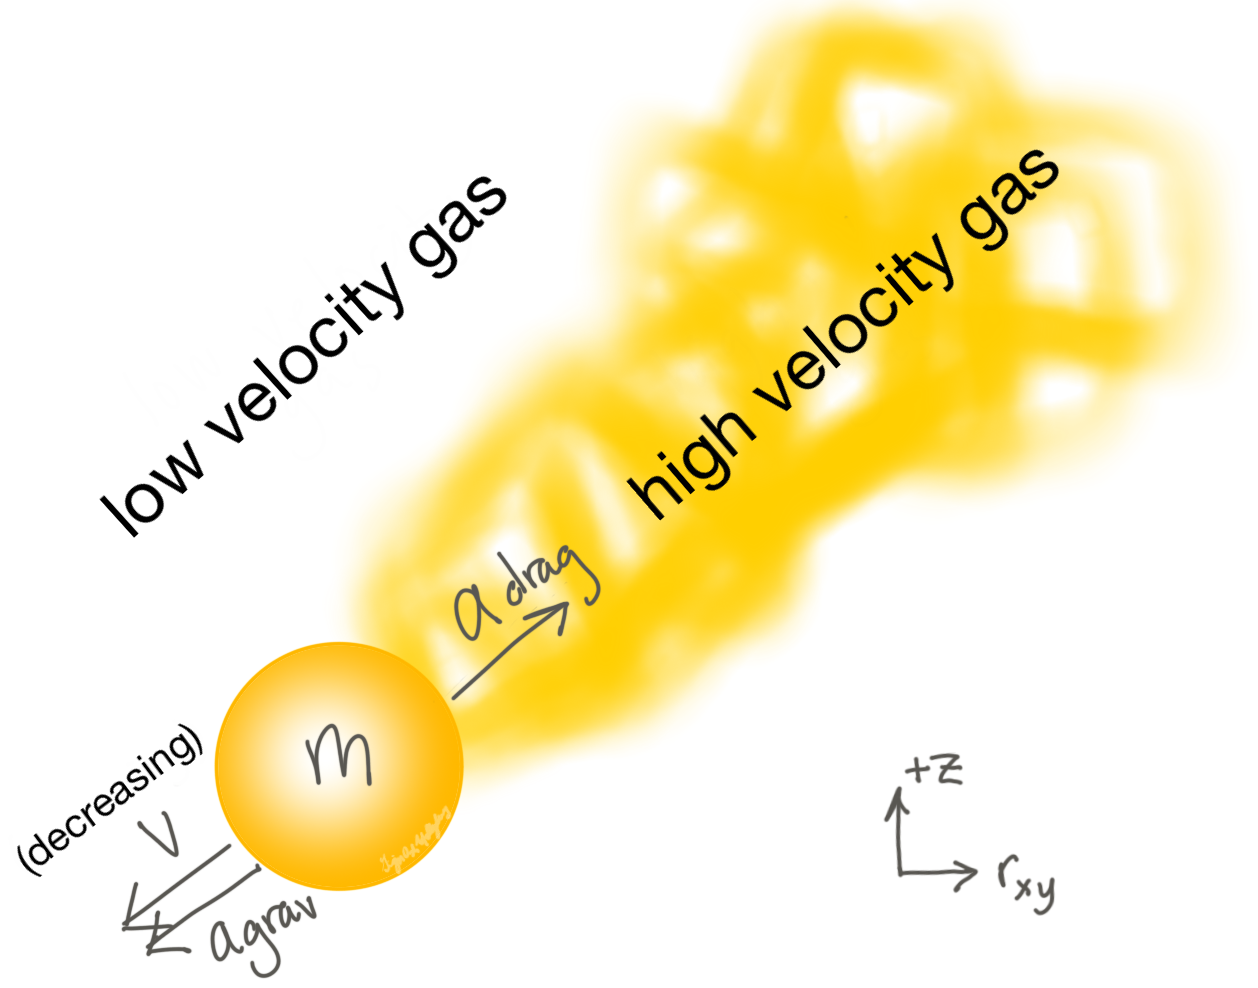

<i>Caption</i>. The accelerations imparted on a recently-condensed droplet of mass m at the photosphere of a synestia. Gravity accelerates the droplet via a$_{grav}$ towards the center of a synestia. Gas drag imparts an acceleration a$_{drag}$ in the opposite direction of motion of the droplet. As gas drag successfully decreases the velocity v of the droplet, the gas responsible for the deceleration (now in the wake of the droplet) will increase in velocity according to conservation of angular momentum. Credit: G. O. Hollyday.

If a moonlet in the midplane spirals inward, and is not accreted by another moonlet or slowed by any means, the moonlet will reach the corotating planet-like region of a synestia and become part of the central planet-like mass. This is known as "falling onto the planet". As the planet-like spheroid's mass increases, its spin must increase to conserve angular momentum (see image below). As a synestia evolves through time, the corotating region will likely rotate at an increasingly faster rate as it accretes more mass from moonlets that could not escape their decaying orbits.

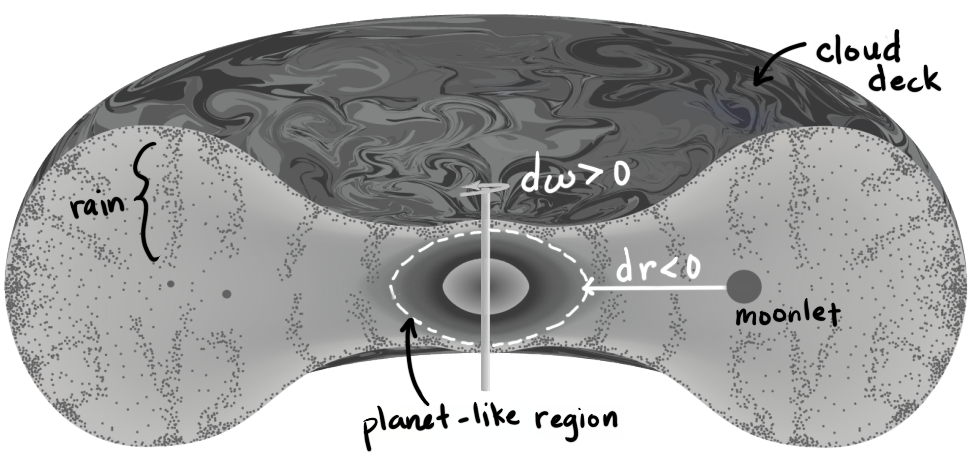

<i>Caption</i>. Moonlets that become part of the planet-like region will cause the planet-like region to spin faster, according to conservation of angular momentum. As a moonlet (large grey circle on right) grows in a synestia, the gas surrounding the moonlet will drag on the moonlet, causing the moonlet to lose orbital velocity and move in towards the oblate, planet-like region (outlined by white dashed line). If the moonlet's radius r decreases to the point where it reaches and adds its mass to the planet-like region, the planet-like region must rotate faster to conserve the system's angular momentum. The faster the planet-like region spins, the more oblate it becomes, and the larger the planet-like region extends out in the midplane. Conceptual drawing of the cross-section of a synestia through its rotational axis. Credit: adapted Figure 18 from ([Lock et al., 2018](https://agupubs.onlinelibrary.wiley.com/doi/full/10.1002/2017JE005333)). Modified with permission from Simon J. Lock and reprinted with permission from AGU.

## Decreasing the Angular Momentum of the Earth-Moon System

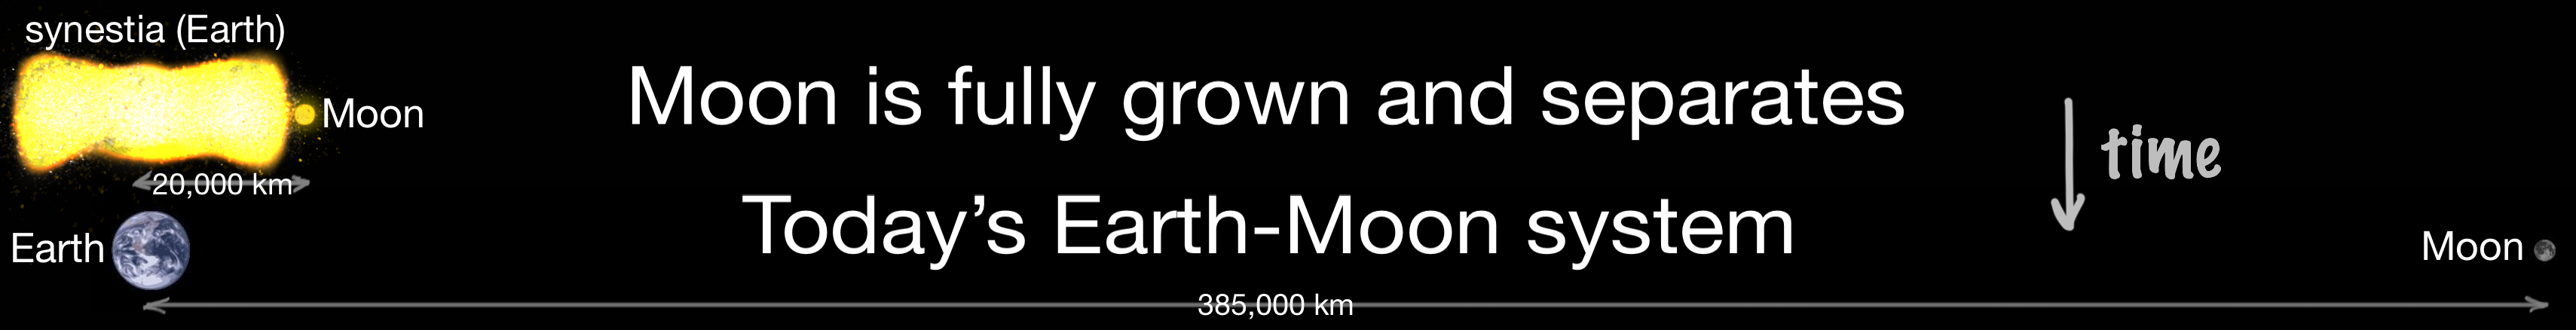

<i>Caption</i>. When the (liquid) Moon finishes growing from a synestia, it is close to the center of the Earth-Moon system (top left). At present, the Moon (bottom right) is far from Earth (bottom left). During the time between the Moon's formation and present-day, the Moon must move away from Earth, the synestia must evolve into a planet, and the Earth-Moon system must cool so that both bodies have crusts. Credit: images of today's Earth-Moon system (bottom) from NASA while conceptual image of synestia-Moon system (top) created by G. O. Hollyday.

When a high-angular-momentum synestia cools enough that it transitions into a system consisting of a molten, rapidly-rotating (oblate) planet and a closely-orbiting, liquid moon, there are still a few steps to reach the Earth-Moon system we know of today (see image above).
1. The first you might be familiar with. Earth must cool over a long period  of time (millions of years) in order to form a solid crust. This will happen naturally as heat radiates from the planet into space.
2. The second has to do with Earth's shape. Present-day Earth is nearly spherical with a slow rotation relative to that of an oblate synestia. Somehow, Earth's spin rate needs to slow. We'll get to this shortly.
3. The third has to do with the Moon. In present-day, the Moon is very far from Earth (about 385,000 km) and continues to move farther away, whereas a synestia will form the Moon very close to early Earth (about 20,000 km). Due to <i>tidal</i> (gravitational) interactions between Earth and the Moon, the Moon moves away from Earth. As Earth's spin slows, angular momentum is transferred to the Moon in order to increase the Moon's distance from Earth. Earth's length of day will increase with time as the Moon travels out to its current radial distance.
4. The fourth, simply, is that the excess angular momentum (relative to present-day angular momentum of the Earth-Moon system) has to be removed.

On that last one, you may be thinking, "Doesn't this violate conservation of angular momentum?" Not necessarily. If a mechanism can provide the means to transfer angular momentum to another system or body, then the angular momentum of one system may decrease while the angular momentum of the other increases. This maintains conservation of angular momentum in the universe.

The angular momentum of a synestia must be conserved if a synestia is an isolated system, but a synestia is not isolated. Synestias are giant-impact-created planet- and moon- forming bodies that orbit their host star. Tidal interactions between a synestia and its moon(s) affect the star as well. The first hypothesis known to decrease the angular momentum of the Earth-Moon system was the <i>evection resonance</i>. The transfer of the angular momentum of the Earth-Moon system, freshly formed from a synestia with higher angular momentum than the present-day Earth-Moon system, to its sun can decrease the Earth-Moon system's angular momentum when the three body system is aligned just right, also known as an evection resonance ([Ćuk & Stewart, 2012](https://science.sciencemag.org/content/338/6110/1047.abstract?casa_token=YK2s0T0-hS4AAAAA:NOkq6ZlzamipqH46gW0Fwj7tC4J9OljQ8On5I7WOZZFf5mEoydHczQUL5C08Gx3HNfZwoL9Up9jkp48); [Rufu & Canup, 2020](https://agupubs.onlinelibrary.wiley.com/doi/full/10.1029/2019JE006312?casa_token=TsHak-NL8AoAAAAA%3ApsvVFldMPvQq2qYNK6_0I39-hH506IRk9qzu_AOpa8FihpkjxazSTjJRjTZZMZLCE8fEAjZjyzHuIklM)). This is known as an <i>evection resonance</i>. An evection resonance occurs when a right angle forms between the Moon, Earth, and sun, with Earth at its vertex (see video below).

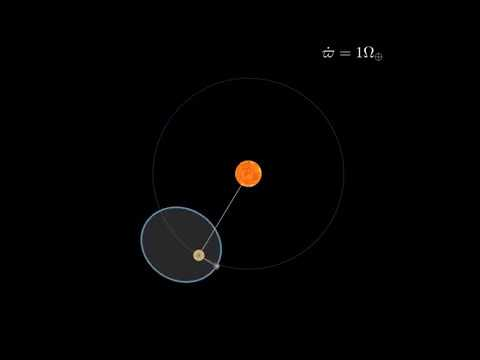

In [1]:
from IPython.display import YouTubeVideo
YouTubeVideo('WjFdKFbMrAY', width=640, height=360)

<i>Caption</i>. When the sun, Earth, and Moon are aligned at right angles, an evection resonance occurs and angular momentum transfers from the Earth-Moon system to the sun. Credit: Reposted with permission from Raluca Rufu ([Rufu & Canup, 2019](https://www.youtube.com/watch?v=WjFdKFbMrAY)).

An evection resonance is possible whenever the Moon's orbit precesses (gradually rotate) 360$^{\circ}$ over the course of one Earth orbital period. At present, the Moon's orbital precession rate is 360$^{\circ}$ per 8.85 years while the Earth's orbital period is 1 year, so the Earth-Moon system is not in an evection resonance in present-day. The sun-Earth-Moon system hits an evection resonance shortly (roughly 10,000 years) after the Moon forms [Ćuk & Stewart, 2012](https://science.sciencemag.org/content/338/6110/1047.abstract?casa_token=fnMPJGfjPyUAAAAA:VfmJUFHJOYY6kMHUiEeesopjsZQWtaKJVhWAoQcMEPlOf2a6_lnOl35Kjvlc-hVl3D6zbLZ8FfZDVEw). When the Moon is captured into an evection resonance, the Moon's orbital precession rate is fixed and its eccentricity increases (its orbit expands) for a time interval on the order of ten thousand years [Ćuk & Stewart, 2012](https://science.sciencemag.org/content/338/6110/1047.abstract?casa_token=fnMPJGfjPyUAAAAA:VfmJUFHJOYY6kMHUiEeesopjsZQWtaKJVhWAoQcMEPlOf2a6_lnOl35Kjvlc-hVl3D6zbLZ8FfZDVEw). The evection resonance ends once Earth's tides balance the Moon's tides. The Moon's orbit then contracts and a transfer of angular momentum occurs from the Moon to Earth to the sun. This transfer of angular momentum will barely increase the rotation rate of the sun. Other processes that move angular momentum out of the Earth-Moon system are currently under investigation ([Wisdom & Tian, 2015](https://www.sciencedirect.com/science/article/abs/pii/S0019103515000779); [Ćuk et al., 2016](https://www.nature.com/articles/nature19846); [Tian et al., 2017](https://www.sciencedirect.com/science/article/abs/pii/S0019103516302780); [Tian & Wisdom, 2020](https://www.pnas.org/content/117/27/15460.short); [Rufu & Canup, 2020](https://agupubs.onlinelibrary.wiley.com/doi/full/10.1029/2019JE006312?casa_token=TsHak-NL8AoAAAAA%3ApsvVFldMPvQq2qYNK6_0I39-hH506IRk9qzu_AOpa8FihpkjxazSTjJRjTZZMZLCE8fEAjZjyzHuIklM)).

This transfer of angular momentum from the Earth-Moon system to the sun is important, because otherwise the hypothesis that a synestia with a bulk Earth composition formed the Earth-Moon system would not be plausible. Additionally, as a result of starting with higher angular momentum, there is a wide range of impact scenarios that can form a lunar mass out of a synestia, compared to the canonical model for lunar formation.

## References

Canup, R. M. (2012). Forming a Moon with an Earth-like Composition via a Giant Impact. <i>Science (American Association for the Advancement of Science)</i>, 338 (6110), 1052-1055.

Ćuk, M., Hamilton, D. P., Lock, S. J., & Stewart, S. T. (2016). Tidal evolution of the Moon from a high-obliquity, high-angular-momentum Earth. <i>Nature</i>, 539 , 402-406.

Ćuk, M., & Stewart, S. T. (2012). Making the Moon from a fast-spinning Earth: A giant impact followed by resonant despinning. <i>Science (American Association for the Advancement of Science)</i>, 338 (6110), 1047-1052.

Lock, S. J., Stewart, S. T., Petaev, M. I., Leinhardt, Z. M., Mace, M. T., Jacobsen, S. B., & Ćuk, M. (2018). The origin of the Moon within a terrestrial synestia. <i>Journal of Geophysical Research: Planets (American Geophysical Union)</i>, 123 (4), 910-951.

Rufu, R., & Canup, R. M. (2019). Evection Resonance. Retrieved from: https://www.youtube.com/watch?v=WjFdKFbMrAY (YouTube)

Rufu, R., & Canup, R. M. (2020). Tidal Evolution of the Evection Resonance/Quasi-Resonance and the Angular Momentum of the Earth-Moon System. <i>Journal of Geophysical Research: Planets (American Geophysical Union)</i>, 125 (8), e2019JE006312.

Tian, Z., Wisdom, J., & Elkins-Tanton, L. (2017). Coupled orbital-thermal evolution of the early Earth-Moon system with a fast-spinning Earth. <i>Icarus</i>, 281 , 90-102.

Tian, Z., & Wisdom, J. (2020). Vertical angular momentum constraint on lunar formation and orbital history. <i>Proceedings of the National Academy of Sciences of the United States of America</i>, 117 (27), 15460-15464.

Wisdom, J., & Tian, Z. (2015). Early evolution of the Earth-Moon system with a fast-spinning Earth. <i>Icarus</i>, 256 , 138-146.